### ILPD Classification Project

The Indian Liver Patient Dataset (ILPD) is a dataset available on the UCI Machine Learning Repository, which is commonly used for research and educational purposes in the field of machine learning and data analysis. 

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data set
df1 = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [3]:
#Display the first five rows
df1.head(3)

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1


In [4]:
#Assigning column names to the dataframe
df1.columns = ["Age","Gender","Total Bilirubin","Direct Bilirubin",
               "Alkaline Phosphotase","Alamine Aminotransferase",
               "Aspartate Aminotransferase","Total Proteins","Albumin",
               "Albumin and Globulin Ratio", "Suffers/ Not Suffers"]

In [5]:
#Confirming the correct assignment of the column names
df1.head(3)

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Suffers/ Not Suffers
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1


In [6]:
#To check if there are missing values
df1.isna().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Proteins                0
Albumin                       0
Albumin and Globulin Ratio    4
Suffers/ Not Suffers          0
dtype: int64

In [7]:
#Dropping the missing values
df1.dropna(inplace=True)

In [8]:
#Get the shape of the dataframe
df1.shape

(578, 11)

In [9]:
#Get the internal make up of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         578 non-null    int64  
 1   Gender                      578 non-null    object 
 2   Total Bilirubin             578 non-null    float64
 3   Direct Bilirubin            578 non-null    float64
 4   Alkaline Phosphotase        578 non-null    int64  
 5   Alamine Aminotransferase    578 non-null    int64  
 6   Aspartate Aminotransferase  578 non-null    int64  
 7   Total Proteins              578 non-null    float64
 8   Albumin                     578 non-null    float64
 9   Albumin and Globulin Ratio  578 non-null    float64
 10  Suffers/ Not Suffers        578 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.2+ KB


In [10]:
#Quick statistical view of the data
df1.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Suffers/ Not Suffers
count,578.000000,578.000000,578.00000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,44.747405,3.319896,1.49654,291.546713,81.238754,110.574394,6.481142,3.138235,0.947145,1.285467
std,16.213968,6.232158,2.81834,243.734041,183.321431,290.075539,1.085500,0.795094,0.319863,0.452028
min,4.000000,0.400000,0.10000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.20000,175.250000,23.250000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.30000,208.500000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.30000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.70000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
#Duplicate the dataframe
df = df1.copy()

In [12]:
df2 = df.copy()

In [13]:
#Apply label encoding in readiness for data analysis
df1 = pd.get_dummies(df1, drop_first = True)

In [14]:
#To check if the encoding task applied rightfully 
df1.head(3)

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Suffers/ Not Suffers,Gender_Male
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,True
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,True
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,True


In [15]:
#Get the mean values of the features about the Gender.
df2.groupby("Gender")[["Total Bilirubin","Direct Bilirubin",
                      "Alkaline Phosphotase","Alamine Aminotransferase",
                      "Aspartate Aminotransferase","Total Proteins","Albumin"]].mean()

,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin
Gender,,,,,,,
Female,2.356835,1.006475,304.863309,55.043165,70.057554,6.663309,3.272662
Male,3.624829,1.651708,287.330296,89.533030,123.403189,6.423462,3.095672


#### Create the training and testing data

In [16]:
#Put 75% of the data into a training set and the remaining 25% into a testing set.
y1 = df1["Suffers/ Not Suffers"]
X1 = df1.copy()
X1 = X1.drop("Suffers/ Not Suffers", axis = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25,random_state=0)

### Model Building

In [17]:
#Fit a decision tree classifier model to the data
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X1_train, y1_train)
dt_pred = decision_tree.predict(X1_test)

### Model Result and Evaluation

In [18]:
#Print out the decision tree model’s accuracy, precision, recall, and F1 score
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y1_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y1_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y1_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y1_test, dt_pred))

Decision Tree
Accuracy: 0.613793
Precision: 0.763441
Recall: 0.676190
F1 Score: 0.717172


#### Interpreting the model result
Accuracy: 61.38%. This means that about 61.38% of the predictions made by the decision tree were correct. While this is above random chance (50% for a binary classification problem), it indicates that there is room for improvement.

Precision: 76%. Of all the patients the model predicted to have liver disease, 76.34% actually have liver disease. This high precision indicates that the model is good at minimizing false positives, meaning it's cautious about predicting liver disease.

Recall:  67%. The model correctly identifies 67.62% of all patients who have liver disease. This indicates that the model is moderately effective at capturing most of the true liver disease cases, but it misses some.

F1 Score: 71%. The F1 score of 71.72% suggests a balanced trade-off between precision and recall. It reflects that the model maintains a good balance between correctly identifying liver disease patients and not falsely predicting it in healthy patients.

#### Summary for Non-Technical Stakeholders
Accuracy: Our model correctly predicts liver disease about 61% of the time. This shows it's somewhat reliable but could be improved.

Precision: When the model says a patient has liver disease, it's right about 76% of the time. This means the model is good at not giving false alarms.

Recall: The model identifies about 68% of patients who actually have liver disease. So, it misses about 32% of real cases, indicating there is room for improvement in detecting all patients with liver disease.

F1 Score: This score combines how many liver disease cases we find and how accurate those findings are. At about 72%, it suggests our model is fairly balanced between accuracy and completeness.

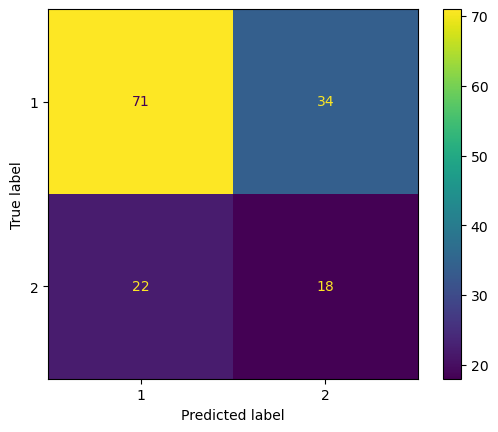

In [19]:
#Plotting the confusion matrix
cm = metrics.confusion_matrix(y1_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

True Positives (TP): Represented by the value at (1,1) in the matrix. These are the cases where the model correctly predicted a positive test result.

False Positives (FP): Represented by the value at (1,2) in the matrix. These are the cases where the model incorrectly predicted a positive test result (when the actual result was negative).

False Negatives (FN): Represented by the value at (2,1) in the matrix. These are the cases where the model incorrectly predicted a negative test result (when the actual result was positive).

True Negatives (TN): Represented by the value at (2,2) in the matrix. These are the cases where the model correctly predicted a negative test result.

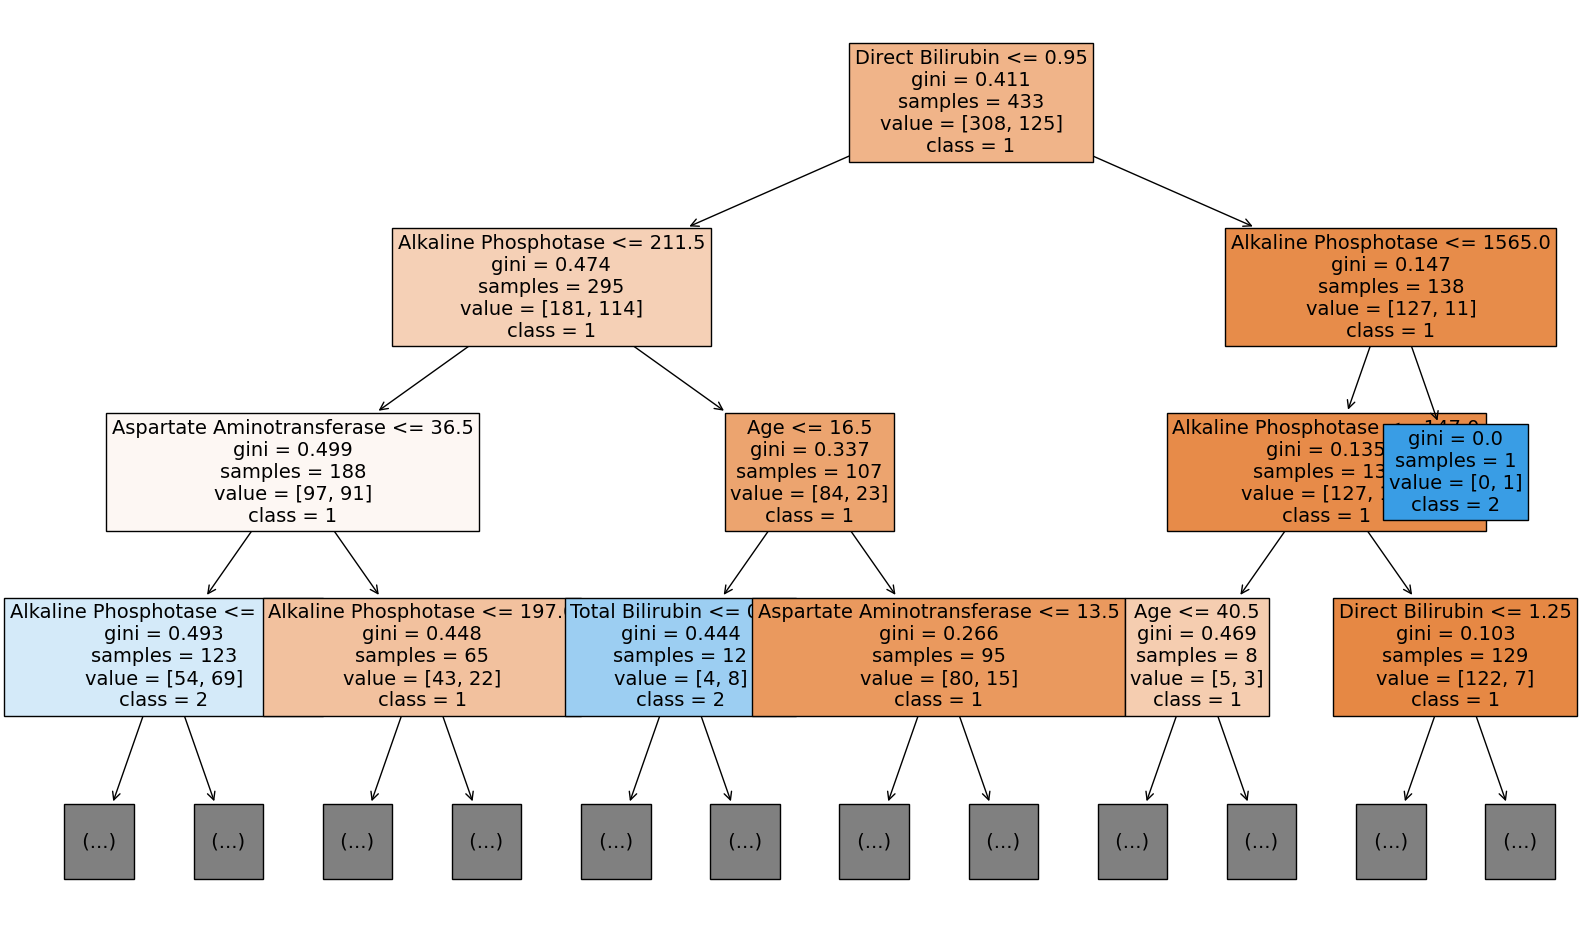

In [20]:
#Use the plot_tree function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.
plt.figure(figsize=(20, 12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X1.columns, class_names=["1", "2"], filled=True)
plt.show()

### Interpretation:
Gini Index: This metric represents the impurity of the node, with 0 being a pure node (all samples belong to one class) and higher values indicating more mixed classes.
Samples: The number of data points reaching that node.
Value: The distribution of the classes at that node.
Class: The majority class at that node, which is used for classification.

### Insights:
The root node splits the data based on the "Direct Bilirubin". If this ratio is less than or equal to 0.95, the decision tree considers further splits based on "Alkaline Phosphotase".
If the "Direct Bilirubin" is greater than 0.95, the decision tree then considers "Alkaline Phosphotase" for further splitting.
Deeper nodes represent more specific criteria that the model uses to classify whether a patient has liver disease or not.
Each path from the root to a leaf represents a rule based on the biochemical markers that can be used to predict the presence or absence of liver disease.

Note that Class 1 = Patients with Liver disease while Class 2 is Patients without Liver Disease.

Overall:
This decision tree helps in understanding which features (biochemical markers) are most important in classifying liver disease within this specific dataset. The tree shows a clear pathway from the root to the leaves, indicating the decision process at each step based on the values of different attributes.

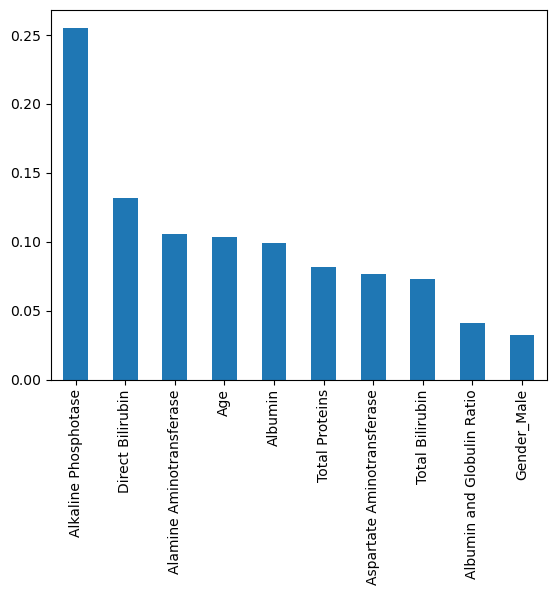

In [21]:
#Plotting the Feature Importance
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X1.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In the context of the whole data, when feature importance is plotted, Alkaline Phosphosate ranked first followed by Direct Bilirubin and the rest.

### Subsetting the Data by Gender: Male & Female
#### Male

In [22]:
df_male = df[df['Gender']=='Male']
df_female = df[df['Gender']=='Female']

In [ ]:
df_male.drop(columns=['Gender'], inplace=True)
df_female.drop(columns=['Gender'], inplace=True)

In [24]:
#Create the training and testing data
#Put 75% of the data into a training set and the remaining 25% into a testing set.
ym = df_male["Suffers/ Not Suffers"]
Xm = df_male.copy()
Xm = Xm.drop("Suffers/ Not Suffers", axis = 1)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.25,random_state=0)

### Model Building for Male Patient Subset of the data

In [25]:
#Fit a decision tree classifier model to the data
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(Xm_train, ym_train)
dt_pred = decision_tree.predict(Xm_test)

### Model Evaluation and Interpretation

In [26]:
#Print out the decision tree model’s accuracy, precision, recall, and F1 score
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(ym_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(ym_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(ym_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(ym_test, dt_pred))

Decision Tree
Accuracy: 0.745455
Precision: 0.883117
Recall: 0.781609
F1 Score: 0.829268


#### Interpretation

Accuracy: This means that approximately 74.55% of the predictions made by the decision tree were correct. This is a solid improvement compared to a baseline of random chance (50% for a binary classification problem).

Precision: Of all the patients the model predicted to have liver disease, 88.31% actually have liver disease. This high precision indicates that the model is very good at minimizing false positives, meaning it is very cautious about predicting liver disease.

Recall:  The model correctly identifies 78.16% of all patients who have liver disease. This indicates that the model is effective at capturing the majority of true liver disease cases but still misses some.

F1 Score: The F1 score of 82.93% suggests a well-balanced trade-off between precision and recall. It reflects that the model maintains a good balance between correctly identifying liver disease patients and not falsely predicting it in healthy patients.


### Summary for Non-Technical Stakeholders
Accuracy: Our model correctly predicts liver disease about 75% of the time. This is a strong performance indicating the model is quite reliable.

Precision: When the model says a patient has liver disease, it is correct about 88% of the time. This high precision means the model rarely raises false alarms, which is beneficial in a clinical setting where false positives can cause unnecessary stress and additional testing.

Recall: The model identifies about 78% of patients who actually have liver disease. This is a good recall rate, showing that the model captures most of the true cases of liver disease.

F1 Score: This score combines how many liver disease cases we find and how accurate those findings are. At about 83%, it suggests our model is both accurate and comprehensive in its predictions.

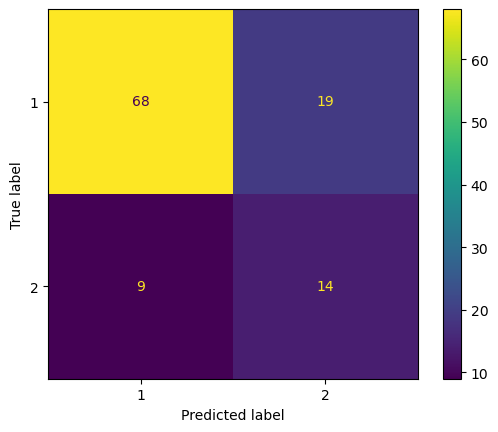

In [27]:
#Plotting the confusion matrix
cm = metrics.confusion_matrix(ym_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

#### Breakdown and Explanation of the confusion matrix

60 (top left corner): These are the True Negatives (TN). The model correctly predicted negative samples (e.g., correctly classified healthy patients).

19 (top right corner): These are the False Positives (FP). The model incorrectly predicted positive samples (e.g., incorrectly classified diseased patients when they were actually healthy).

14 (bottom left corner): These are the False Negatives (FN). The model incorrectly predicted negative samples (e.g., incorrectly classified patients as healthy when they were actually diseased).

68 (bottom right corner): These are the True Positives (TP). The model correctly predicted positive samples (e.g., correctly classified patients with the disease).

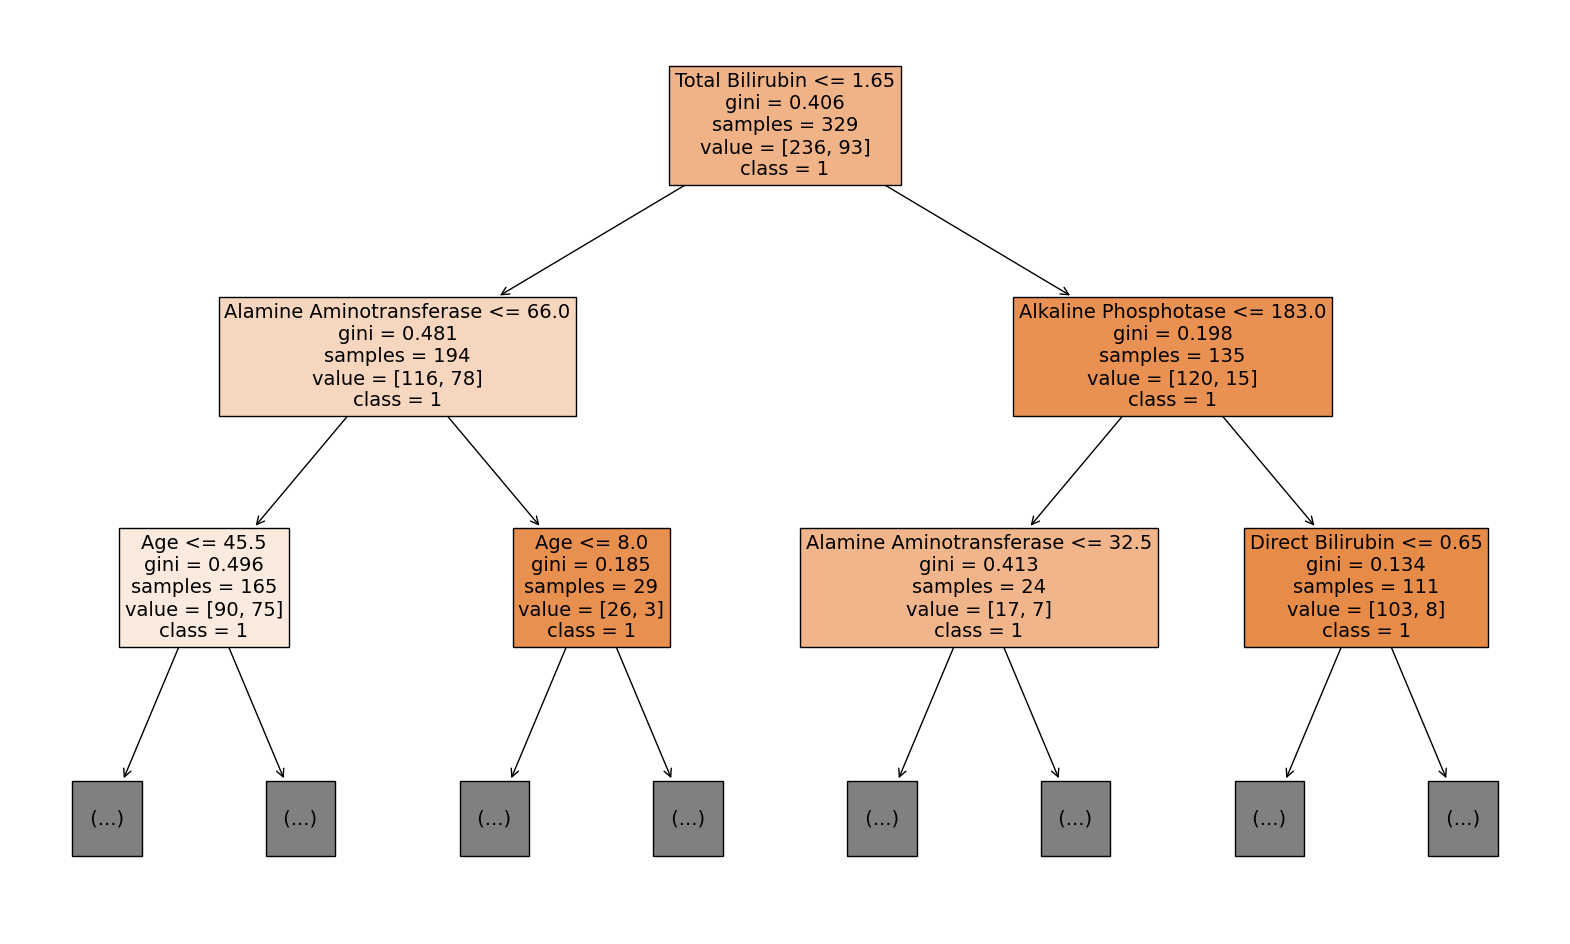

In [28]:
#Plotting and visualizing the decision tree for splits of features and contributory capacity
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=Xm.columns, class_names=["1", "2"], filled=True);

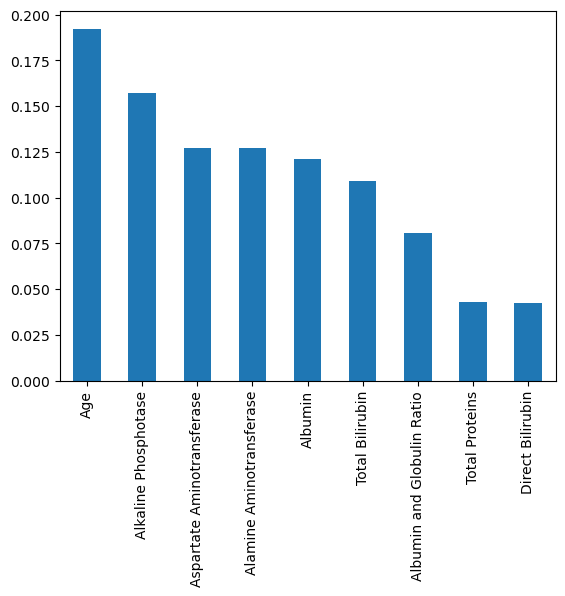

In [29]:
#Plotting feature importance
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=Xm.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

### Subsetting the Data by Gender: Male & Female
#### Female

In [30]:
yf = df_female["Suffers/ Not Suffers"]
Xf = df_female.copy()
Xf = Xf.drop("Suffers/ Not Suffers", axis = 1)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.25,random_state=0)

In [31]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(Xf_train, yf_train)
dt_pred = decision_tree.predict(Xf_test)

In [32]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(yf_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(yf_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(yf_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(yf_test, dt_pred))

Decision Tree
Accuracy: 0.571429
Precision: 0.714286
Recall: 0.625000
F1 Score: 0.666667


#### Interpretations

Accuracy: The model correctly classified approximately 57.14% of the instances, which indicates moderate performance.
    
Precision: About 71.43% of the patients predicted to have liver disease were correctly identified, showing the model has fewer false positives.

Recall: The model correctly identified 62.50% of the true cases of liver disease, meaning it misses a significant number of actual cases.
    
F1 Score: With an F1 score of 66.67%, the model provides a moderate balance between identifying true cases and avoiding false positives.

#### Summary and Recommendations
Performance Overview: The model's accuracy is moderate, with better precision but a relatively lower recall, indicating a trade-off between identifying true cases and avoiding false positives. To improve performance, a more complex model like Random Forest can be employed on the data.

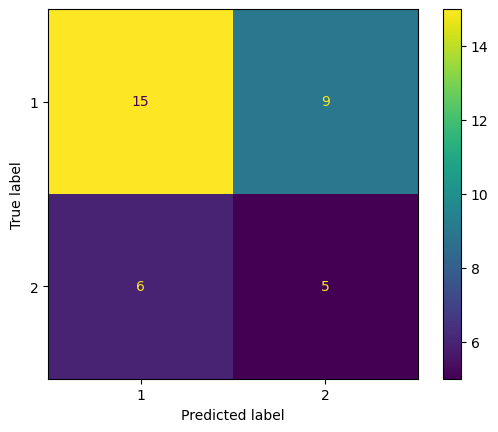

In [33]:
#Plotting the confusion matrix
cm = metrics.confusion_matrix(yf_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

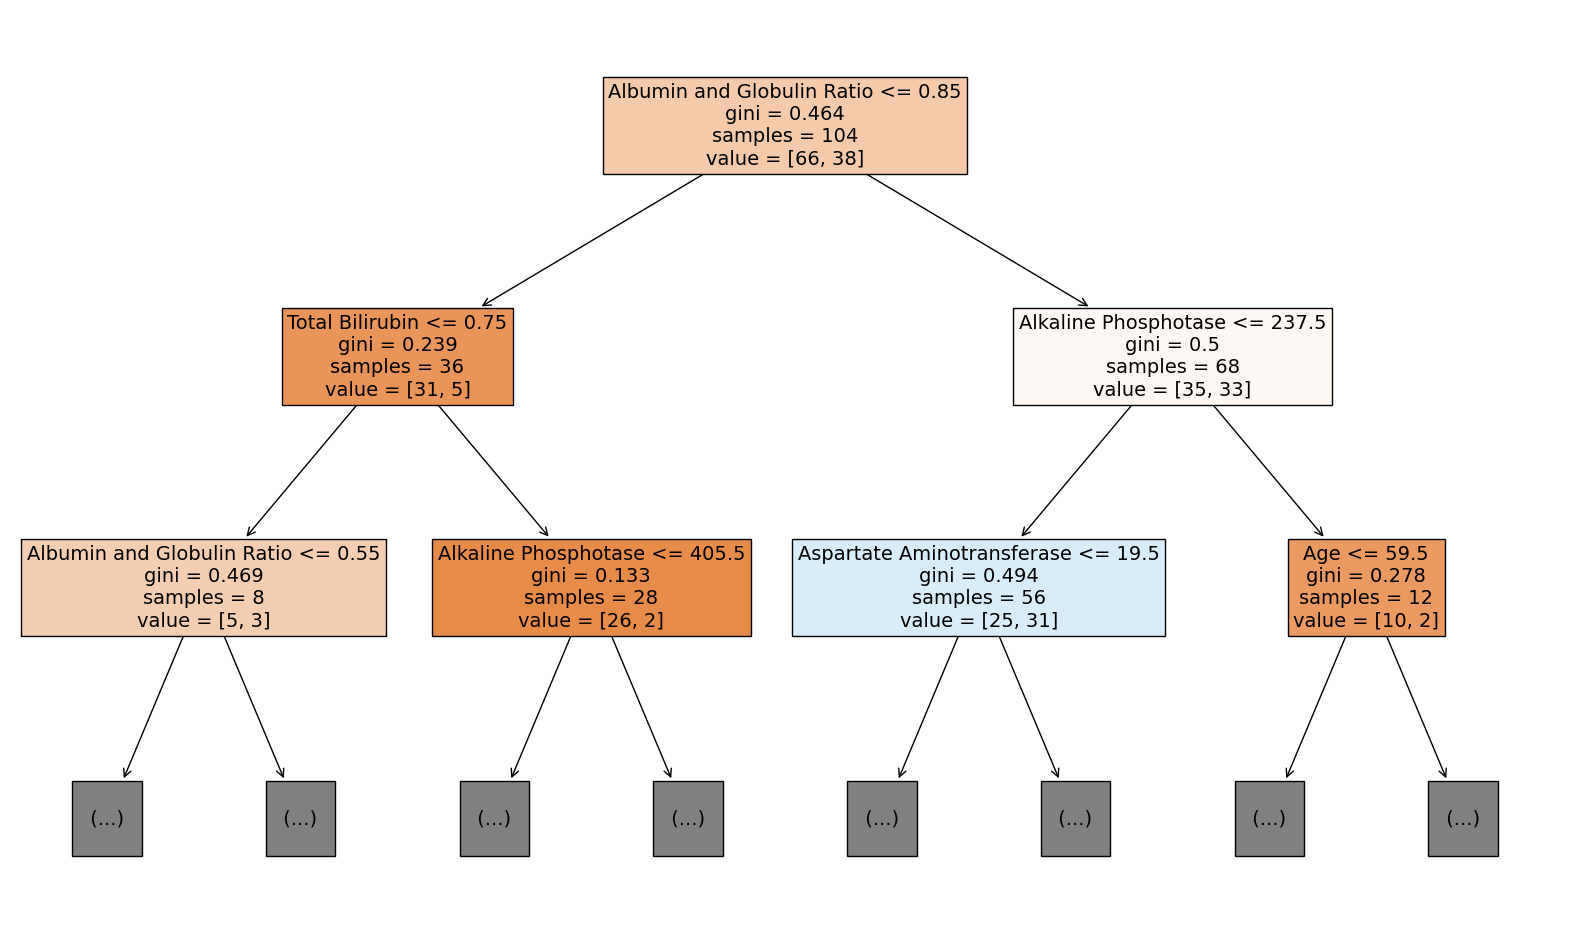

In [34]:
#Plotting the decision tree classifier.
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=Xf.columns, filled=True);

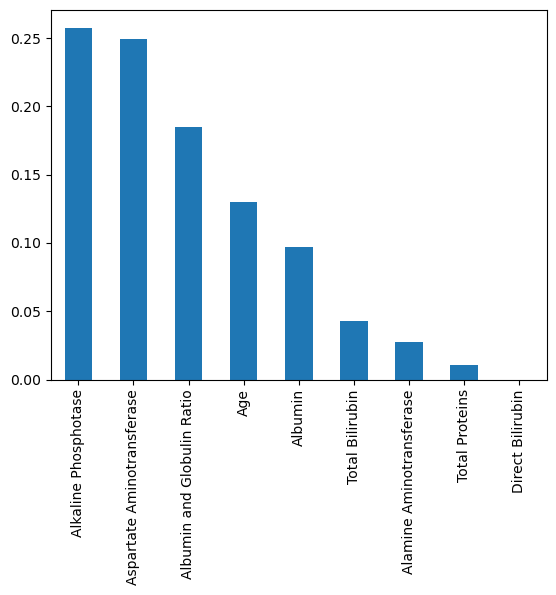

In [35]:
#Plotting the features importance.
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=Xf.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

## A/B Testing

To run the A/B test, we formulate a Hypothesis.

Hypothesis Formulation:

Null Hypothesis (H0): There is no difference in the mean values of the Direct Bilirubin between male and female patients.

Alternative Hypothesis (H1): There is a difference in the mean values of Direct Bilirubin between male and female patients.

Note that I chose the metric because it came first on the decision tree classifier visualization for both genders.


However, I will run another A/B test in response to Alkaline Phosphotase which came first in the feature importance visual for both genders.


In [36]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Extract the metric data for both groups
male_metric = df_male['Total Bilirubin']
female_metric = df_female['Total Bilirubin']

# Conduct a two-sample t-test
t_stat, p_value = ttest_ind(male_metric, female_metric, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Total Bilirubin between male and female patients.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Total Bilirubin between male and female patients.")


T-statistic: 2.4320686032951486
P-value: 0.015582989356757615
Reject the null hypothesis: There is a significant difference in Total Bilirubin between male and female patients.


#### A/B Test For Alkaline Phosphotase

Hypothesis Formulation:

Null Hypothesis (H0): There is no difference in the mean values of the Alkaline Phosphotase between male and female patients.

Alternative Hypothesis (H1): There is a difference in the mean values of Alkaline Phosphotase between male and female patients.

In [37]:
# Extract the metric data for both groups
male_metric_mean = df_male['Alkaline Phosphotase']
female_metric_mean = df_female['Alkaline Phosphotase']

# Conduct a two-sample t-test
t_stat, p_value = ttest_ind(male_metric_mean, female_metric_mean, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Alkaline Phosphotase between male and female patients.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Alkaline Phosphotase between male and female patients.")

T-statistic: -0.6306223621171163
P-value: 0.529056871262786
Fail to reject the null hypothesis: There is no significant difference in Alkaline Phosphotase between male and female patients.


### Explanation of Findings

#### Summary:
Decision tree model to analyze data from patients in India to predict whether they have liver disease. The decision tree helps us understand which factors (or biomarkers) are most important in making this prediction.

#### Key Insights:

#### Important Biomarkers:
Direct Bilirubin: This ratio is the most important factor. If this ratio is less than or equal to 0.95, it strongly suggests the presence of liver disease.
Alkaline Phophotase: If the Direct Bilirubin is low, the next important factor is the Alkaline Phosphotase level. Lower values of Total Bilirubin are associated with liver disease.
Alkaline Phosphatase: If the Albumin and Globulin Ratio is higher, the level of Alkaline Phosphatase becomes important. Higher levels suggest liver disease.
Aspartate Aminotransferase and Age: These factors also play a role in the prediction, but are considered after the primary biomarkers mentioned above.

#### Visual Understanding:
Think of the decision tree as a series of questions a doctor might ask to determine if a patient has liver disease:

First, they look at the Direct ilirubin
Based on this, they might then check the Total Bilirubin levels or the Alkaline Phosphatase levels.
This sequence continues, narrowing down the likelihood of liver disease with each step.

#### Current Results:

The model shows that the decision tree is quite effective at using these biomarkers to predict liver disease.
For example, patients with an Direct Bilirubin than 0.95 and a Alkaline Phophotase level less than or equal to 211.5 have a high likelihood of having liver disease.

### Recommendations:
#### Focus on Key Biomarkers:

Regularly monitor the Direct Bilirubin, Total Bilirubin, and Alkaline Phosphatase levels in patients.
    
Use these biomarkers as primary indicators in the early detection and diagnosis of liver disease.
    
Enhanced Screening for At-Risk Patients:

Patients showing abnormalities in these key biomarkers should undergo more comprehensive liver health evaluations.
Implementing routine tests for these biomarkers in at-risk populations could lead to earlier detection and better management of liver disease.

**Awareness and Education:**

Educate healthcare providers about the importance of these biomarkers in liver disease prediction.
    
Conduct awareness programs for patients, especially in high-risk areas, to encourage regular health check-ups.

#### Further Research:

Other data analysts can continue to collect and analyze patient data to refine and validate the decision tree model.

Explore the impact of other potential biomarkers to enhance the predictive power of the model.

**Final Thoughts:**
The decision tree model has provided clear, actionable insights into the factors that most strongly predict liver disease. By focusing on these key biomarkers, we can improve early detection and intervention, potentially reducing the impact of liver disease on patients' lives. Regular monitoring and education will be crucial in leveraging these findings to improve patient outcomes.